In [10]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

In [11]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

In [17]:
#data_path=r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K1.c3d"
data_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\2020-08-06-B0446-S01-E01-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pyomeca import Analogs

import dataprocesing as dp

freq=1000
def onset_offset_muscles(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    emg.plot(x="time", col="channel", col_wrap=3)
    
    plt.show()
    emg = dp.emg_full_preproces(data_path)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),             # mean of the signal         
        n_above=freq / 2,                     # we want at least 1/2 second above the threshold
        n_below=freq / 2,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=2.8, 
                        top=0.9, 
                        wspace=0.25, 
                        hspace=0.35)
        for (start, end) in onsets:
            plt.axvline(x=start/1000, color="g")
            plt.axvline(x=end/1000, color="r")
            emg[i].plot()
            emg_std.plot()
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
            #print(threshold)
        plt.show()
    
                        


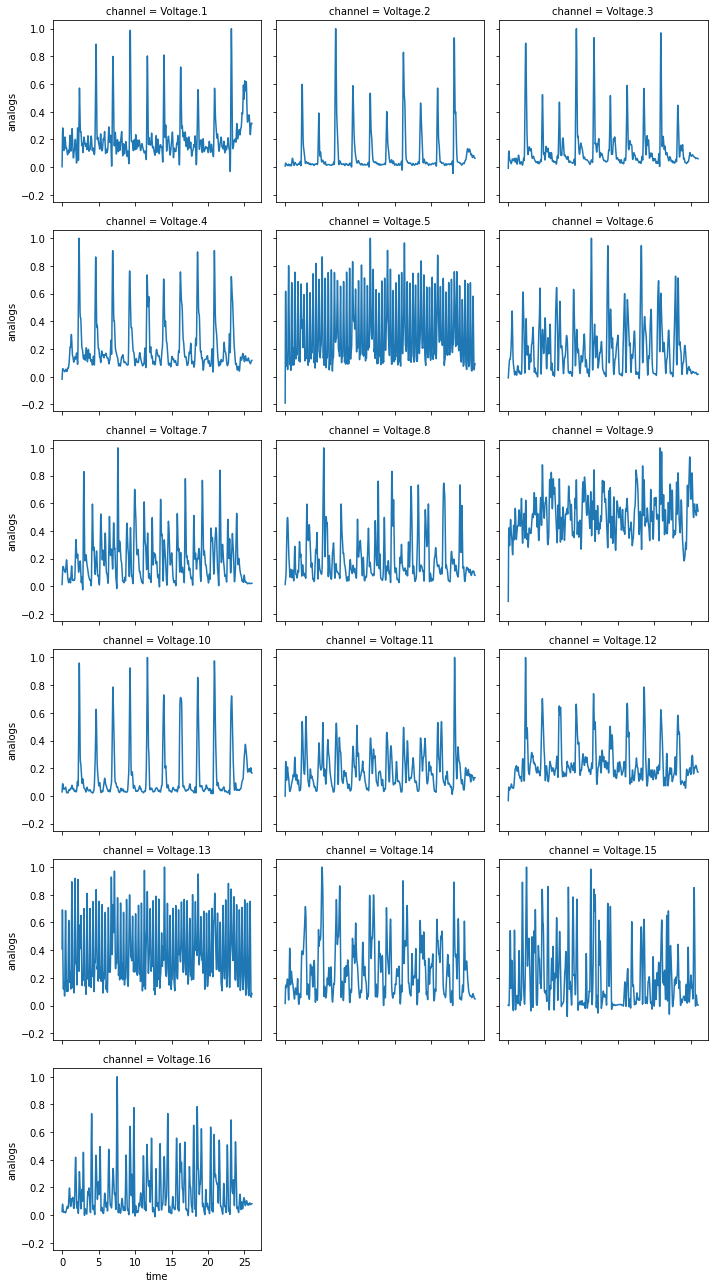

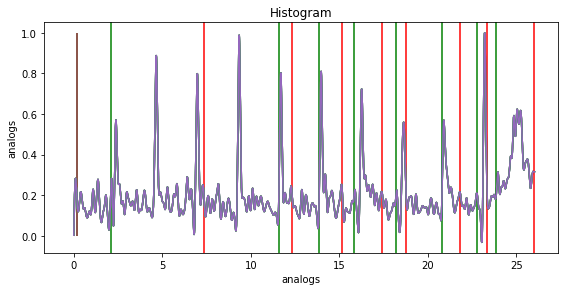

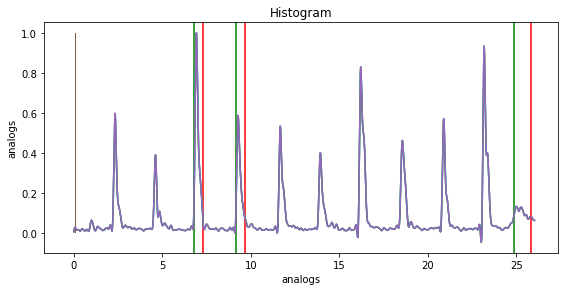

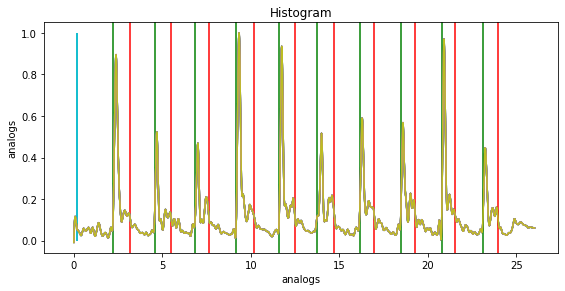

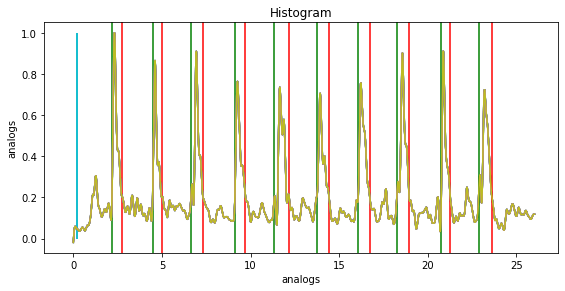

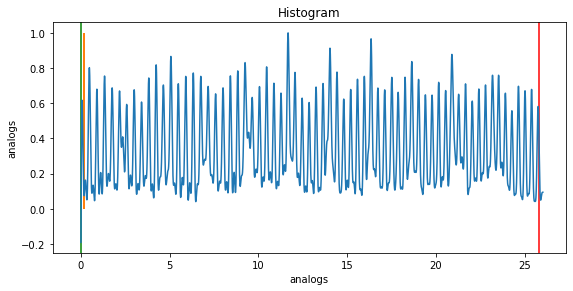

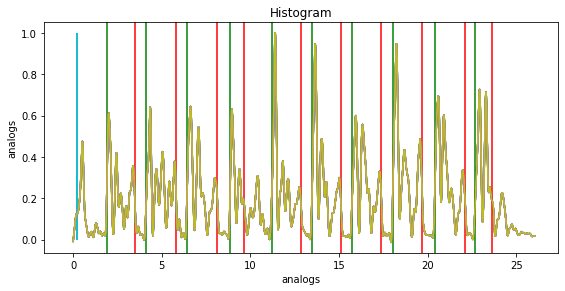

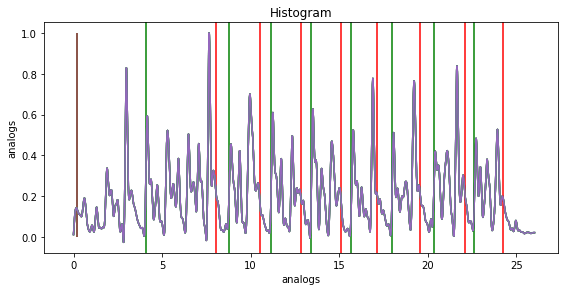

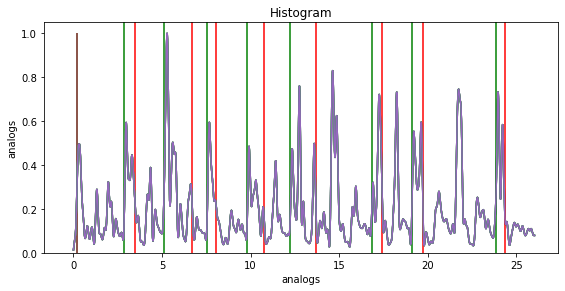

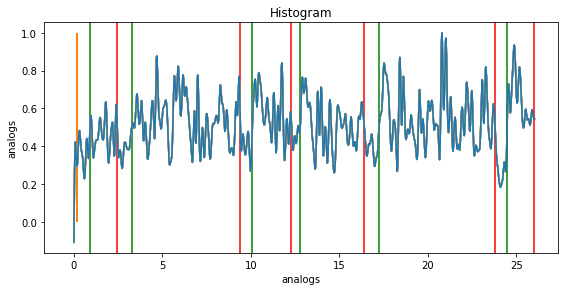

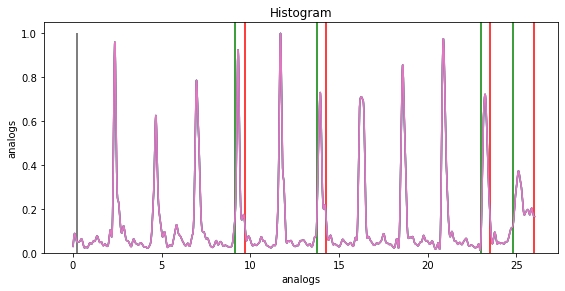

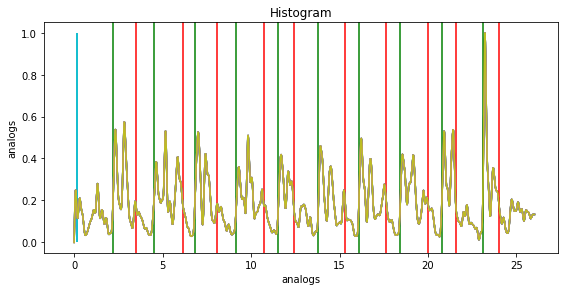

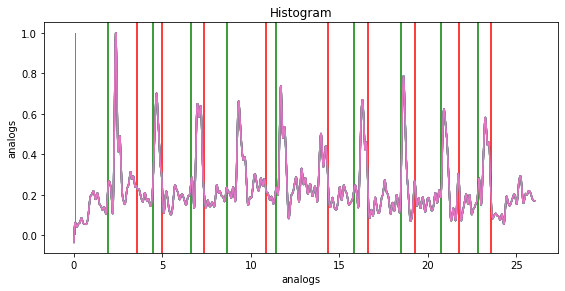

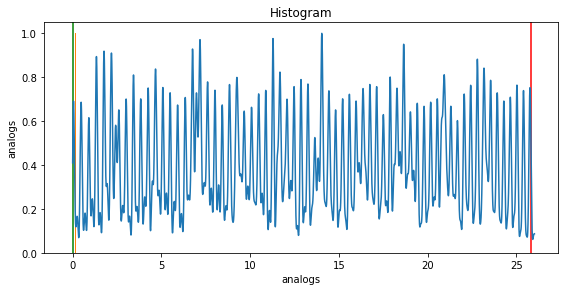

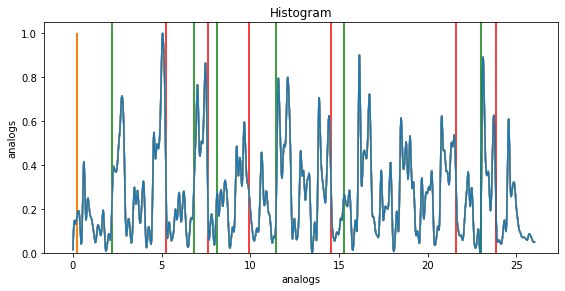

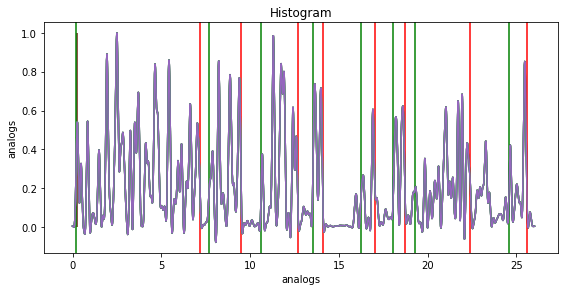

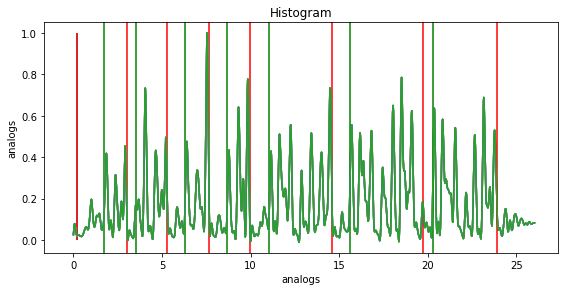

In [20]:
onset_offset_muscles(data_path)